In [2]:
import pandas as pd
import seaborn

In [10]:
data=pd.read_csv("uber-raw-data-apr14.txt")
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [12]:
data.tail(1)

,Date/Time,Lat,Lon,Base
564515,4/30/2014 23:48:00,40.688,-73.9608,B02764


In [20]:
data.rename(columns={'Date/Time':'date'},inplace=True)

In [22]:
dt='4/30/2014 23:48:00'

In [27]:
d,t=dt.split(' ')
print(d)
print(t)

4/30/2014
23:48:00


In [28]:
dt='4/30/2014 23:48:00'

In [39]:
dt=pd.to_datetime(dt)

In [49]:
dt.month_name()   #4/30/2014 4Th month is april

'April'

In [51]:
dt.year

2014

In [53]:
dt.date()

datetime.date(2014, 4, 30)

In [54]:
dt.week   # this is 18th day of the week

18

In [56]:
data['date']=data['date'].map(pd.to_datetime)

In [59]:
data['date'].head(1)

0   2014-04-01 00:11:00
Name: date, dtype: datetime64[ns]

In [61]:
def get_dom(dt):
    return dt.day
data['dom']=data['date'].map(get_dom)

In [63]:
data.head()    #dom is date of perticular row

,date,Lat,Lon,Base,dom
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


In [64]:
def get_weekday(dt):
    return dt.weekday()
data['weekday']=data['date'].map(get_weekday)
def get_hour(dt):
    return dt.hour
data['hour']=data['date'].map(get_hour)

In [66]:
data.tail()

,date,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


(array([52721., 59680., 52581., 58631., 45427., 56764., 38781., 60673.,
        64697., 74561.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <a list of 10 Patch objects>)

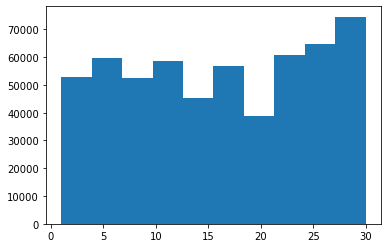

In [92]:
import matplotlib.pyplot as plt
plt.hist(data.dom)

Text(0.5, 1.0, 'frequency of rides wrt to date')

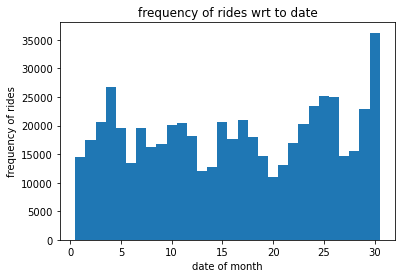

In [96]:
plt.hist(data.dom,bins=30,range=(0.5,30.5))
plt.xlabel('date of month')
plt.ylabel('frequency of rides')
plt.title('frequency of rides wrt to date')

In [102]:
for k,rows in data.groupby('dom'):
    print(k,len(rows))

1 14546
2 17474
3 20701
4 26714
5 19521
6 13445
7 19550
8 16188
9 16843
10 20041
11 20420
12 18170
13 12112
14 12674
15 20641
16 17717
17 20973
18 18074
19 14602
20 11017
21 13162
22 16975
23 20346
24 23352
25 25095
26 24925
27 14677
28 15475
29 22835
30 36251


In [104]:
def count_rows(rows):
    return len(rows)
by_date=data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

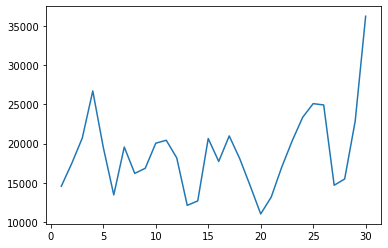

In [107]:
plt.plot(by_date)

In [111]:
by_date_sorted=by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

'  #if it showing unneccesary data in o/p then put semicolumn'

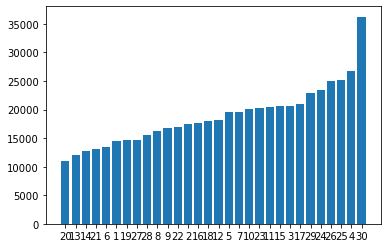

In [120]:
plt.bar(range(1,31),by_date_sorted)
plt.xticks(range(1,31),by_date_sorted.index)
;   #if it showing unneccesary data in o/p then put semicolumn

''

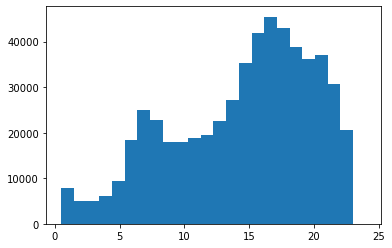

In [123]:
# analyse of hour
plt.hist(data.hour,bins=24,range=(0.5,24))
;

In [124]:
def count_rows(rows):
    return len(rows)
by_date=data.groupby('hour').apply(count_rows)
by_date

hour
0     11910
1      7769
2      4935
3      5040
4      6095
5      9476
6     18498
7     24924
8     22843
9     17939
10    17865
11    18774
12    19425
13    22603
14    27190
15    35324
16    42003
17    45475
18    43003
19    38923
20    36244
21    36964
22    30645
23    20649
dtype: int64

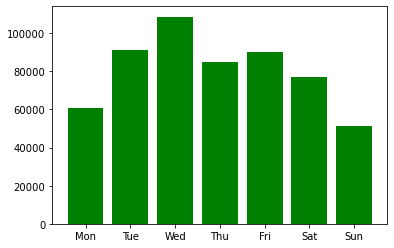

In [136]:
plt.hist(data.weekday,bins=7,range=(-0.5,6.5),rwidth=0.8,color='g')
plt.xticks(range(7),'Mon Tue Wed Thu Fri Sat Sun'.split());

In [137]:
count_rows(data)

564516

In [139]:
data.groupby('hour weekday'.split()).apply(count_rows).head(20)

hour  weekday
0     0           518
      1           765
      2           899
      3           792
      4          1367
      5          3027
      6          4542
1     0           261
      1           367
      2           507
      3           459
      4           760
      5          2479
      6          2936
2     0           238
      1           304
      2           371
      3           342
      4           513
      5          1577
dtype: int64

In [142]:
by_cross=data.groupby('hour weekday'.split()).apply(count_rows).unstack()
by_cross

weekday,0,1,2,3,4,5,6
hour,,,,,,,
0,518,765,899,792,1367,3027,4542
1,261,367,507,459,760,2479,2936
2,238,304,371,342,513,1577,1590
3,571,516,585,567,736,1013,1052
4,1021,887,1003,861,932,706,685
5,1619,1734,1990,1454,1382,704,593
6,2974,3766,4230,3179,2836,844,669
7,3888,5304,5647,4159,3943,1110,873
8,3138,4594,5242,3616,3648,1372,1233


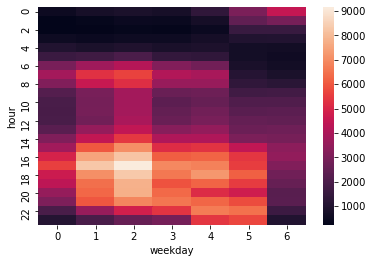

In [143]:
 seaborn.heatmap(by_cross)

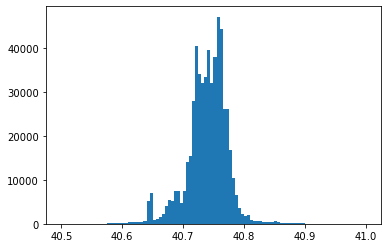

In [156]:
plt.hist(data['Lat'],bins=100,range=(40.5,41));

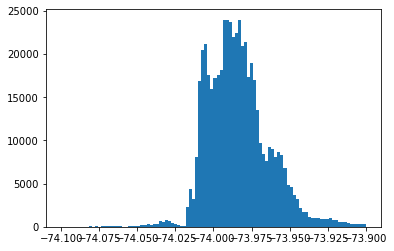

In [157]:
plt.hist(data['Lon'],bins=100,range=(-74.1,-73.9));

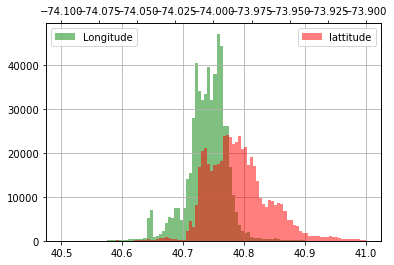

In [164]:
plt.hist(data['Lat'],bins=100,range=(40.5,41),color='g',alpha=0.5,label='Longitude')
plt.grid()
plt.legend(loc='upper left')
plt.twiny()
plt.hist(data['Lon'],bins=100,range=(-74.1,-73.9),color='r',alpha=0.5,label='lattitude')
plt.legend(loc='best');

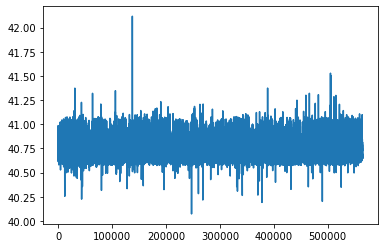

In [168]:
plt.plot(data['Lat'])

(0.0, 100.0)

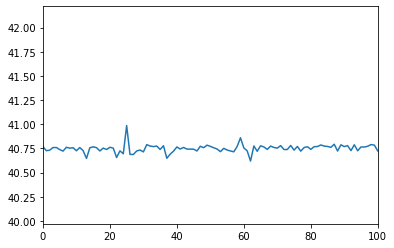

In [170]:
plt.plot(data['Lat'])
plt.xlim(0,100)

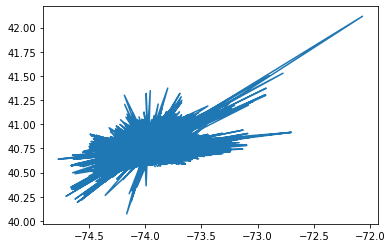

In [171]:
plt.plot(data['Lon'],data['Lat'])